# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
#mouse_metadata_path = r'C:\Users\user\Downloads\starter_Code(3)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv'
#study_results_path = r'C:\Users\user\Downloads\starter_Code(3)\Starter_Code\Pymaceuticals\data\Study_results.csv'


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data = combined_data.sort_values(by="Timepoint", ascending=True)
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1529,s619,Stelasyn,Male,22,30,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0
1531,t198,Propriva,Male,22,26,0,45.0,0
551,a788,Zoniferol,Male,5,30,0,45.0,0


In [50]:
# Checking the number of mice.
mouse_count = combined_data['Mouse ID'].unique().shape[0]

print(mouse_count)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates=combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], False)]
duplicates["Mouse ID"].unique()


array(['g989'], dtype=object)

In [6]:
# Get all the data for the duplicate mouse IDs
combined_data[combined_data["Mouse ID"]=="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
908,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop the duplicate rows based on the Mouse ID

clean_df=combined_data[combined_data["Mouse ID"]!="g989"]

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1529,s619,Stelasyn,Male,22,30,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0
1531,t198,Propriva,Male,22,26,0,45.0,0
551,a788,Zoniferol,Male,5,30,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame.
Micecount= len(clean_df["Mouse ID"].unique())
Micecount

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary2=clean_df.groupby(["Drug Regimen"])

meanvolume=summary2["Tumor Volume (mm3)"].mean() 
medianvolume=summary2["Tumor Volume (mm3)"].median()
varvolume=summary2["Tumor Volume (mm3)"].var()
stdvolume=summary2["Tumor Volume (mm3)"].std()
semvolume=summary2["Tumor Volume (mm3)"].sem()
summary_df=pd.DataFrame({"Mean Tumor Volume": meanvolume,
                        "Median Tumor Volume":medianvolume,
                        "Tumor Volume Variance":varvolume,
                        "Tumore Volume Std. Dev.":stdvolume,
                        "Tumor Volume Std. Err.":semvolume})
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumore Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:>

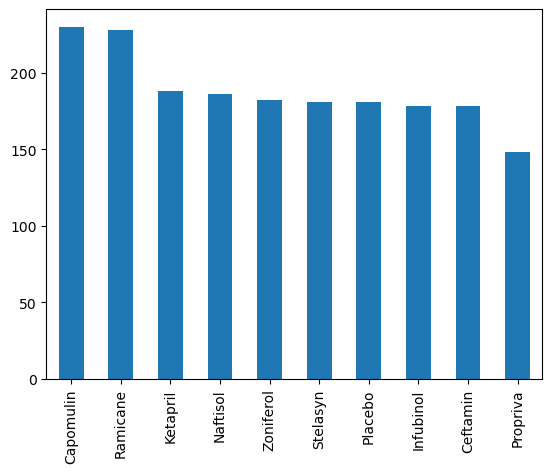

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure(1)
clean_df['Drug Regimen'].value_counts().plot(kind='bar')

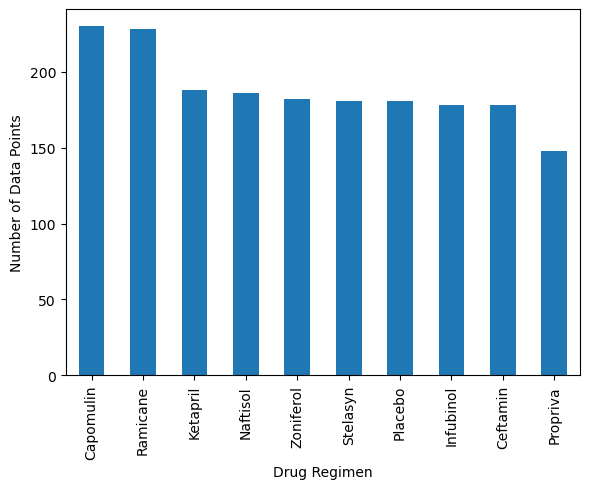

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis1=clean_df["Drug Regimen"].value_counts()

x_axis1.plot(kind="bar", figsize=(6,5))
#plt.title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.show()

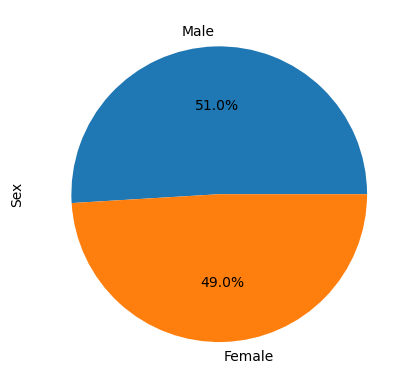

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=clean_df["Sex"].value_counts()
sex.plot(kind="pie", autopct='%.1f%%')
#plt.savefig("Piechart1")
plt.show()

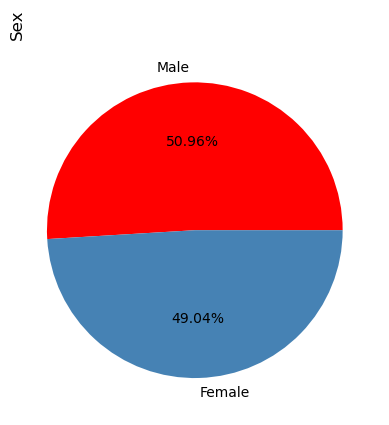

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexcount=clean_df["Sex"].value_counts()
labels=sexcount.index.tolist() 
colors=["red", "steelblue"]
explode=(0,0)
plt.pie(sexcount, explode=explode, labels=labels, colors=colors,
       autopct="%.2f%%", shadow=False) #startangle=180)
plt.title("Sex", loc="left", rotation=90) #align="center")
#plt.xticks(rotation=90)
#plt.hist("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_id = clean_df.groupby(["Mouse ID", "Drug Regimen"])
mouse_id.head()
max_timepoint = mouse_id["Timepoint"].max()
max_timepoint

df_1 = pd.DataFrame({"Timepoint": max_timepoint})
df_1

df_1 = df_1.reset_index()
df_1

last_tumor = pd.merge(df_1, clean_df, on= ("Mouse ID", "Timepoint", "Drug Regimen"), how= "left")
last_tumor.head()

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1


In [40]:
only_Capomulin = clean_df.loc[combined_data['Drug Regimen'] == "Capomulin", :]
only_Capomulin
Capomulin = only_Capomulin['Tumor Volume (mm3)']
only_Capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.0,0
328,j119,Capomulin,Female,7,23,0,45.0,0
310,j246,Capomulin,Female,21,21,0,45.0,0
300,b128,Capomulin,Female,9,22,0,45.0,0
290,b742,Capomulin,Male,7,21,0,45.0,0


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for drug in treatment_list:
    only_drug = clean_df.loc[combined_data['Drug Regimen'] == drug, :]
    drug_name = only_drug["Tumor Volume (mm3)"]
    quartiles = drug_name.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor sizes is: {lowerq}")
    print(f"The upper quartile of tumor sizes is: {upperq}")
    print(f"The interquartile range of tumor sizes is: {iqr}")
    print(f"The the median of tumor sizes is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}: Values below {lower_bound} could be outliers.")
    print(f"{drug}: Values above {upper_bound} could be outliers.")
    
    tumor_df = pd.DataFrame({"Tumor Volume (mm3)": drug_name})
    tumor_df
    
    tumor = pd.DataFrame({"Tumor Volume (mm3)": drug_name})
    tumor
    outliers = tumor.loc[(tumor["Tumor Volume (mm3)"] > upper_bound) | (tumor["Tumor Volume (mm3)"] < lower_bound ), :] 
    outliers
    print(f" Outliers: {outliers['Tumor Volume (mm3)']}")
    print("\n")

The lower quartile of tumor sizes is: 37.685932865
The upper quartile of tumor sizes is: 45.0
The interquartile range of tumor sizes is: 7.314067135000002
The the median of tumor sizes is: 41.557808879999996 
Capomulin: Values below 26.714832162499995 could be outliers.
Capomulin: Values above 55.9711007025 could be outliers.
 Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


The lower quartile of tumor sizes is: 36.674634585
The upper quartile of tumor sizes is: 45.0
The interquartile range of tumor sizes is: 8.325365415
The the median of tumor sizes is: 40.67323554 
Ramicane: Values below 24.1865864625 could be outliers.
Ramicane: Values above 57.488048122500004 could be outliers.
 Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64


The lower quartile of tumor sizes is: 47.3123533
The upper quartile of tumor sizes is: 57.314443967500004
The interquartile range of tumor sizes is: 10.002090667500006
The the median of tumor sizes is: 51

In [46]:
only_drug = clean_df.loc[combined_data['Drug Regimen'] == "Infubinol", :]
drug_name = only_drug["Tumor Volume (mm3)"]
tumor_df = pd.DataFrame({"Tumor Volume (mm3)": drug_name})
tumor_df
outliers = tumor_df.loc[(tumor_df["Tumor Volume (mm3)"] > 72.31757996875001 ) | (tumor_df["Tumor Volume (mm3)"] < 32.309217298749985 ), :] 
outliers

,Tumor Volume (mm3)


<Figure size 640x480 with 0 Axes>

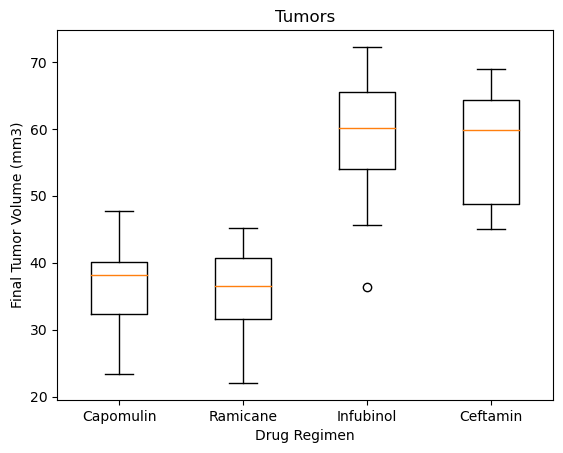

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumors1 = last_tumor.loc[last_tumor['Drug Regimen'] == "Capomulin", :]
tumors_1 = tumors1["Tumor Volume (mm3)"]
tumors2 = last_tumor.loc[last_tumor['Drug Regimen'] == "Ramicane", :]
tumors_2 = tumors2["Tumor Volume (mm3)"]
tumors3 = last_tumor.loc[last_tumor['Drug Regimen'] == "Infubinol", :]
tumors_3 = tumors3["Tumor Volume (mm3)"]
tumors4 = last_tumor.loc[last_tumor['Drug Regimen'] == "Ceftamin", :]
tumors_4 = tumors4["Tumor Volume (mm3)"]

data_to_plot = [tumors_1, tumors_2, tumors_3, tumors_4]

plt.figure(5)
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

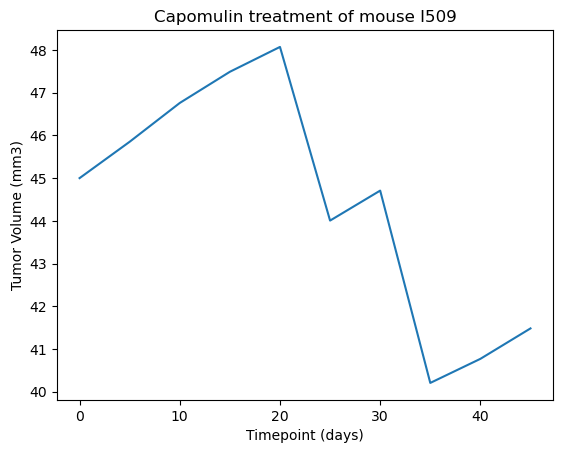

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo1_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capo1_df=capo1_df.reset_index()
#loc mouse I509
cap_tumor_df=capo1_df.loc[capo1_df["Mouse ID"]== "l509"]

#Define Variables and axis
x_axis_capo=cap_tumor_df["Timepoint"]
y_axis_capo=cap_tumor_df["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

#Plot using plt.plot(x,y,line,marker, color)
plt.plot(x_axis_capo, y_axis_capo)

plt.show()


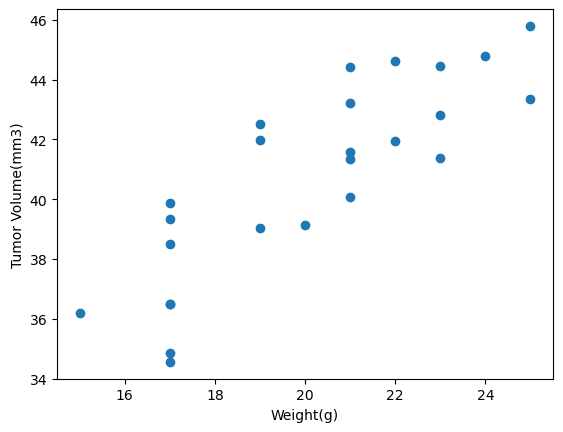

In [52]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average1=capo1_df.groupby(["Mouse ID"]).mean()
#average1
plt.scatter(average1["Weight (g)"], average1["Tumor Volume (mm3)"])
#x_values=subset["Capomulin"]
#y_values=subset["Tumor Volume(mm3)"].mean()
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()


## Correlation and Regression

In [58]:
# Calculate the correlation coefficient and a linear regression model 
Capomulin = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin", :]
avg = Capomulin.groupby(['Mouse ID']).mean()
correlation =round(st.pearsonr(avg['Weight (g)'],avg['Tumor Volume (mm3)'])[0],2)
print(f"correlation: {correlation}")

correlation: 0.84


In [59]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
model=st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

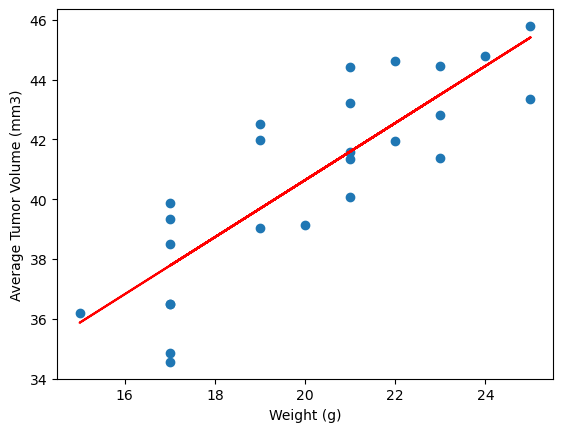

In [61]:
slope1=0.9544396890241045
intercept1=21.552160532685015
# for mouse weight and average tumor volume for the Capomulin regimen
#x_axis_corr=average1["Weight (g)"]
#y_axis_corr=average1["Tumor Volume (mm3)"]
#lineregress(x_axis_corr, y_axis_corr)
#assign slope and intercepts to identify r
y_axis_corr = average1['Weight (g)']*slope1+intercept1
#create secondary scatter plot
plt.scatter(average1['Weight (g)'],average1['Tumor Volume (mm3)'])
#plotline
plt.plot(average1['Weight (g)'],y_axis_corr,color="red") #marker=o
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()